In [32]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.decomposition import PCA , KernelPCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('simp_clust.csv', index_col=0)

In [3]:
df

,X1,X2
Name,,
A,23,150
B,24,167
C,67,256
D,65,240
E,12,102
F,11,96
G,15,112
H,10,100
I,34,156


In [4]:
df_clust = df.copy()


In [5]:
scaler = StandardScaler().set_output(transform='pandas')
df_Scaled = scaler.fit_transform(df)

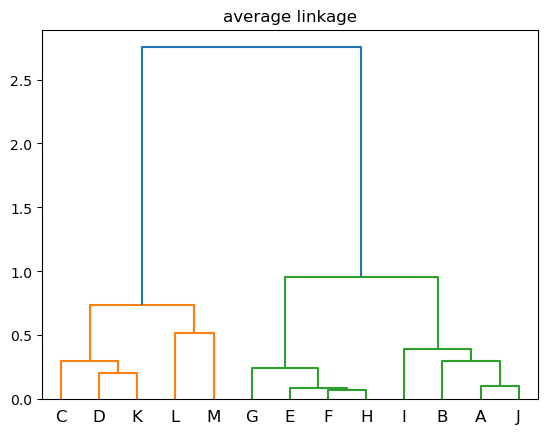

In [6]:
link = 'average'
mergings = linkage(df_Scaled,method=link)
dendrogram(mergings, labels = list(df_Scaled.index))
plt.title(link + ' linkage')
plt.show()

In [7]:
clust = AgglomerativeClustering(n_clusters=3,linkage='average')

In [8]:
clust.fit(df_Scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [9]:
cluster_labels = clust.labels_

In [10]:
cluster_labels

array([1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0], dtype=int64)

In [11]:
print(silhouette_score(df_Scaled, cluster_labels))

0.748692102698497


In [12]:
n = [2,3,4,5]
scores = []
for i in n:
    clust = AgglomerativeClustering(n_clusters=i,linkage='average')
    clust.fit(df_Scaled)
    cluster_labels = clust.labels_
    scores.append(silhouette_score(df_Scaled, cluster_labels))

scores

[0.768624569487621, 0.748692102698497, 0.6421852005052356, 0.5707802627177359]

## Clustering For Milk Dataset

In [42]:
milk = pd.read_csv('milk.csv', index_col=0)

In [44]:
milk_scl = scaler.fit_transform(milk)

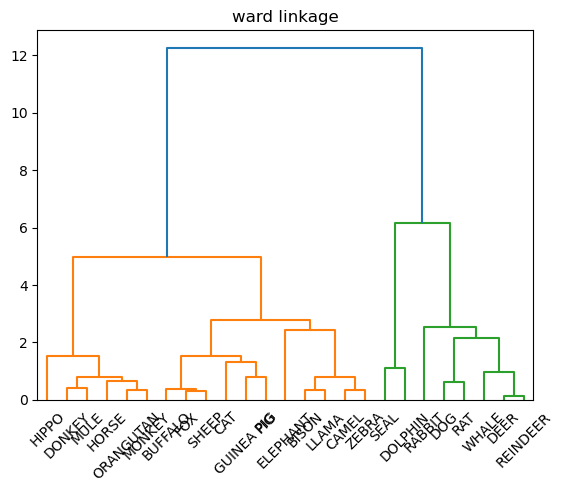

In [16]:
link = 'ward'
mergings = linkage(milk_scl,method=link)
dendrogram(mergings, labels = list(milk_scl.index))
plt.title(link + ' linkage')
plt.show()

In [17]:
n = [2,3,4,5,6]
linkages = ['ward', 'complete', 'average', 'single']
scores = []
for i in n:
    for li in linkages:
        clust = AgglomerativeClustering(n_clusters=i,linkage=li)
        clust.fit(milk_scl)
        cluster_labels = clust.labels_
        scores.append([i,li,silhouette_score(milk_scl, cluster_labels)])

scores

[[2, 'ward', 0.5258508931703421],
 [2, 'complete', 0.45578949666992635],
 [2, 'average', 0.5186847578981009],
 [2, 'single', 0.5186847578981009],
 [3, 'ward', 0.5391595072079529],
 [3, 'complete', 0.48757649189546187],
 [3, 'average', 0.48757649189546187],
 [3, 'single', 0.3972253549904414],
 [4, 'ward', 0.44348050284244644],
 [4, 'complete', 0.41601538367376095],
 [4, 'average', 0.41601538367376095],
 [4, 'single', 0.061484726009959995],
 [5, 'ward', 0.3983013785769646],
 [5, 'complete', 0.40926029392635116],
 [5, 'average', 0.3830100222472541],
 [5, 'single', 0.00139695255985119],
 [6, 'ward', 0.37500726130001616],
 [6, 'complete', 0.4196143478444149],
 [6, 'average', 0.37428423003570394],
 [6, 'single', -0.1189781230103192]]

In [26]:
clust = AgglomerativeClustering(n_clusters=3,linkage='ward')
clust.fit(df_Scaled)

AgglomerativeClustering(n_clusters=3)

In [28]:
df_clust = df.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)
df_clust.sort_values('Clust')

,X1,X2,Clust
Name,,,
C,67,256,0
D,65,240,0
K,70,234,0
L,80,257,0
M,85,289,0
A,23,150,1
B,24,167,1
I,34,156,1
J,25,145,1


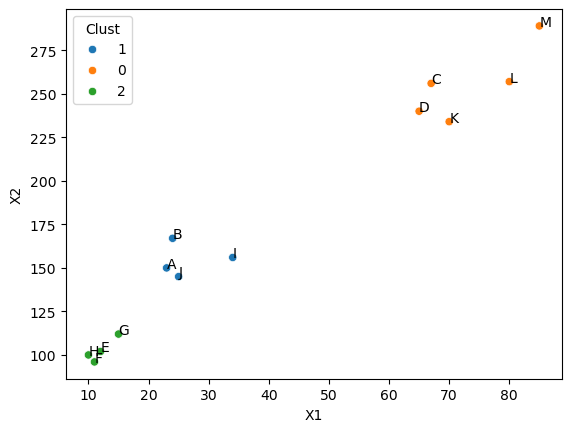

In [30]:
sns.scatterplot(x = df_clust['X1'], y=df_clust['X2'], hue=df_clust['Clust'])
for i in range(0, df.shape[0]):
    plt.text(df_clust['X1'].values[i], df_clust['X2'].values[i], list(df.index)[i])
plt.show()

In [34]:
## PCA on milk

In [50]:
milk = pd.read_csv('milk.csv', index_col=0)
milk_scl = scaler.fit_transform(milk)
clust = AgglomerativeClustering(n_clusters=3,linkage='ward')
clust.fit(milk_scl)

AgglomerativeClustering(n_clusters=3)

In [52]:
pca = PCA().set_output(transform='pandas')
pca_data = pca.fit_transform(milk_scl)

In [54]:
df_clust = pca_data.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)
df_clust.columns

Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'Clust'], dtype='object')

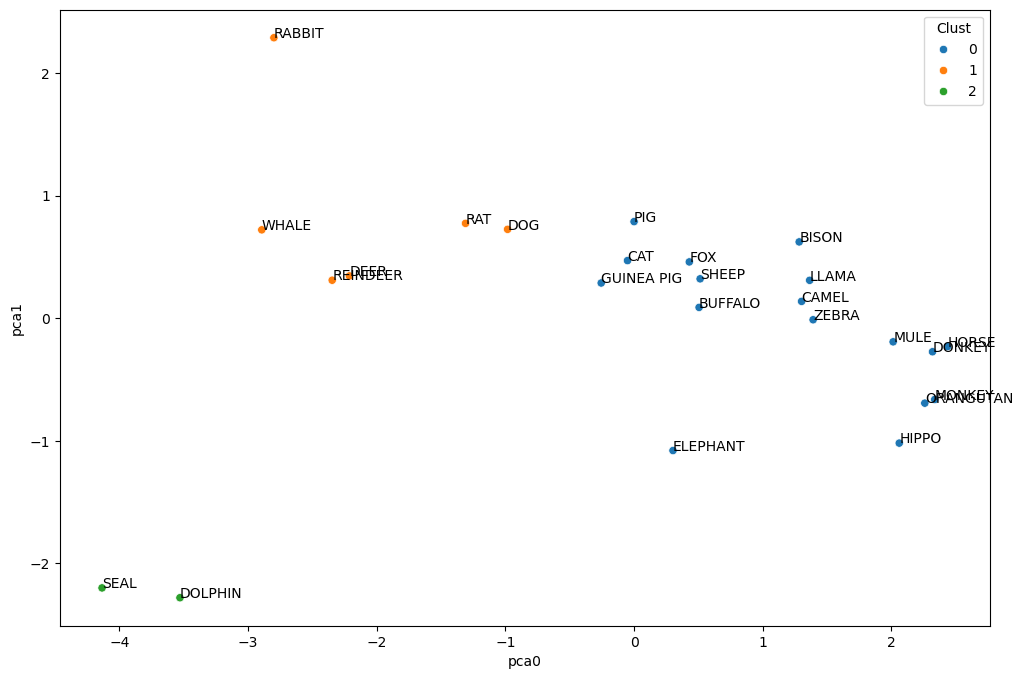

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df_clust['pca0'], y=df_clust['pca1'], hue=df_clust['Clust'])
for i in range(0, milk.shape[0]):
    plt.text(df_clust['pca0'].values[i], df_clust['pca1'].values[i], list(milk.index)[i])
plt.show()

### Nutrient Dataset

In [67]:
nur = pd.read_csv('nutrient.csv', index_col=0)

In [69]:
nur

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [73]:
scl = StandardScaler().set_output(transform='pandas')
nur_scl = scl.fit_transform(nur)

In [75]:
pca = PCA()
pca_data = pca.fit_transform(nur_scl)

In [79]:
n = [2,3,4,5,6]
linkages = ['ward', 'complete', 'average', 'single']
scores = []
for i in n:
    for li in linkages:
        clust = AgglomerativeClustering(n_clusters=i,linkage=li)
        clust.fit(nur_scl)
        cluster_labels = clust.labels_
        scores.append([i,li,silhouette_score(nur_scl, cluster_labels)])

scores

[[2, 'ward', 0.3257858973486016],
 [2, 'complete', 0.3257858973486016],
 [2, 'average', 0.41345065968561695],
 [2, 'single', 0.44834235285877894],
 [3, 'ward', 0.4037300375344603],
 [3, 'complete', 0.4037300375344603],
 [3, 'average', 0.44531853755129397],
 [3, 'single', 0.44531853755129397],
 [4, 'ward', 0.41580070002787306],
 [4, 'complete', 0.41580070002787306],
 [4, 'average', 0.3311159158397946],
 [4, 'single', 0.3311159158397946],
 [5, 'ward', 0.37172390624572643],
 [5, 'complete', 0.4000030856637424],
 [5, 'average', 0.4000030856637424],
 [5, 'single', 0.2407084635335691],
 [6, 'ward', 0.3590128349896957],
 [6, 'complete', 0.3590128349896957],
 [6, 'average', 0.36637668089351516],
 [6, 'single', 0.16952595410533547]]

In [87]:
pca = PCA().set_output(transform='pandas')
pca_data = pca.fit_transform(nur_scl)

In [89]:
bm = AgglomerativeClustering(n_clusters=2 , linkage='single')
bm.fit(nur_scl)

AgglomerativeClustering(linkage='single')

In [97]:
df_clust = pca_data.copy()
df_clust['Clust'] = bm.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)
df_clust.columns

Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'Clust'], dtype='object')

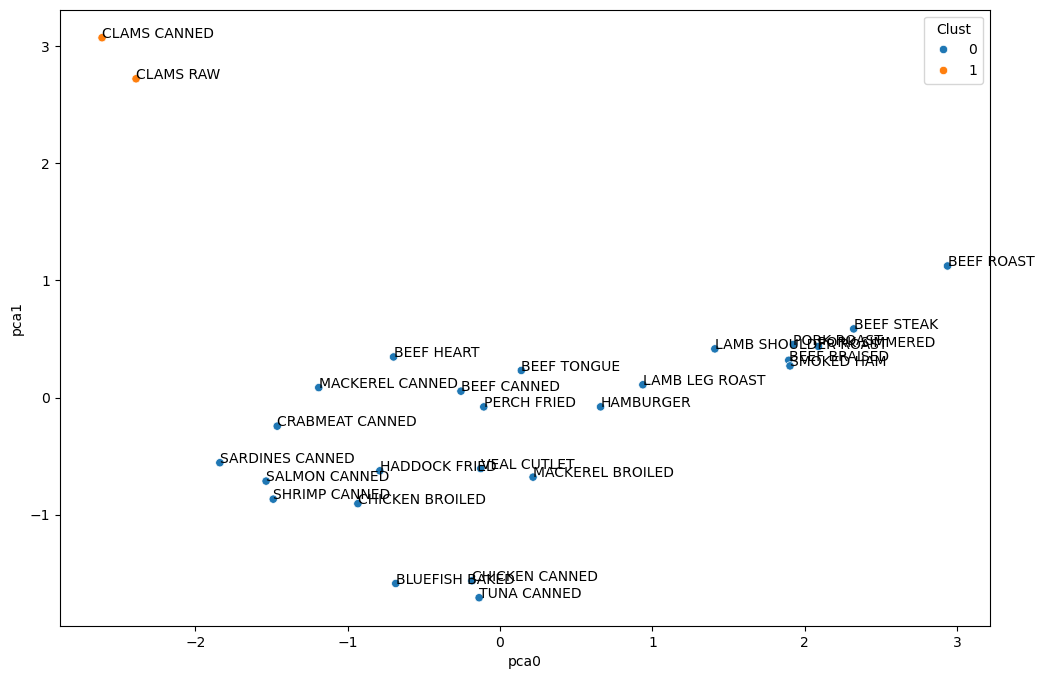

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df_clust['pca0'], y=df_clust['pca1'], hue=df_clust['Clust'])
for i in range(0, nur.shape[0]):
    plt.text(df_clust['pca0'].values[i], df_clust['pca1'].values[i], list(nur.index)[i])
plt.show()